<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Доверительные-интервалы-для-оценки-среднего" data-toc-modified-id="Доверительные-интервалы-для-оценки-среднего-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Доверительные интервалы для оценки среднего</a></span><ul class="toc-item"><li><span><a href="#Генерация-данных" data-toc-modified-id="Генерация-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Генерация данных</a></span></li><li><span><a href="#Сравнение-линейных-моделей" data-toc-modified-id="Сравнение-линейных-моделей-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Сравнение линейных моделей</a></span><ul class="toc-item"><li><span><a href="#Точечная-оценка" data-toc-modified-id="Точечная-оценка-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Точечная оценка</a></span></li><li><span><a href="#Оценка-среднего" data-toc-modified-id="Оценка-среднего-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Оценка среднего</a></span></li><li><span><a href="#Точечная-оценка-среднего" data-toc-modified-id="Точечная-оценка-среднего-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Точечная оценка среднего</a></span></li><li><span><a href="#Интервальная-оценка-среднего" data-toc-modified-id="Интервальная-оценка-среднего-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Интервальная оценка среднего</a></span><ul class="toc-item"><li><span><a href="#z-интервал" data-toc-modified-id="z-интервал-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>z-интервал</a></span></li><li><span><a href="#t-интервал" data-toc-modified-id="t-интервал-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>t-интервал</a></span></li></ul></li></ul></li></ul></li></ul></div>

**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ sklearn 0.19.1

# Доверительные интервалы для оценки среднего

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
import sklearn
print(np.__version__)
print(sklearn.__version__)

1.18.5
0.23.1


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерация данных

Сгенерируем набор данных и решим задачу бинарной классификации. На этом наборе данных обучим две линейные модели и будем сравнивать их качество. Качество сравним не в точке, а сравнивать его интервально с помощью интервальной оценки на среднее по некоторой метрике. 

In [4]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

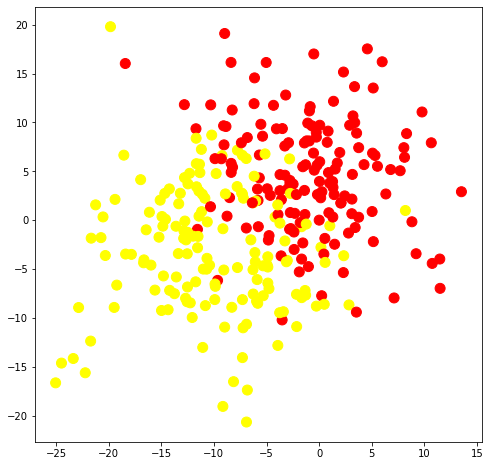

In [5]:
pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c = blobs[1], cmap = 'autumn',
             s=100)

## Сравнение линейных моделей

На обучении строим наши модели, далее на тесте их оцениваем и сравниваем их качество.


Первая модель — это модель RidgeClassifier, Ridge-классификатор, и вторая модель — это SGDClassifier, классификатор на основе стохастического градиентного спуска.




### Точечная оценка

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 15,
                                                                                    random_state = 1)

In [7]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.8888888888888888

In [8]:
sgd_model = linear_model.SGDClassifier(random_state = 0, max_iter = 1000)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.7777777777777778

Кажется, что SGDClassifier работает хуже RidgeClassifier. Это точечная оценка.

### Оценка среднего

Обучим нмодели несколько раз, несколько раз оценим качество и сравним средние значения показателей качества. Для того чтобы это реализовать, можно воспользоваться функцией cross_val_score. Она разбивает наши данные на обучение и тест в соответствии с той стратегией, которую мы с вами выберем, и далее возвращает нам список оценок качества нашей модели на тестовых подвыборках. 

Будем разбивать наши данные по стратегии key fold на 20 фолдов, и оценим качество в каждом из них. Оценивать качество будем с помощью метрики roc_auc. 

В результате получим два массива, два списка оценок на тестах. Выведем среднее и отклонение метрики roc_auc для каждой из моделей и сравним полученные результаты.

In [9]:
sgd_auc_scores = model_selection.cross_val_score(linear_model.SGDClassifier(max_iter = 1000), 
                                 blobs[0], blobs[1], scoring = 'roc_auc', cv = 20)

In [10]:
sgd_auc_scores

array([1.        , 0.875     , 0.82142857, 0.83928571, 0.89285714,
       1.        , 0.73214286, 0.94642857, 0.875     , 1.        ,
       0.71428571, 0.91071429, 0.80357143, 0.96428571, 0.96428571,
       0.98214286, 0.82142857, 1.        , 0.98214286, 0.89285714])

In [11]:
ridge_auc_scores = model_selection.cross_val_score(linear_model.RidgeClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

In [12]:
ridge_auc_scores

array([1.        , 0.89285714, 0.92857143, 0.89285714, 0.98214286,
       1.        , 0.73214286, 1.        , 0.92857143, 1.        ,
       0.85714286, 0.96428571, 0.91071429, 0.96428571, 0.98214286,
       1.        , 0.82142857, 0.98214286, 0.98214286, 0.91071429])

### Точечная оценка среднего

In [13]:
print("sgd model auc: mean %.3f, std %.3f" % (sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print("ridge model auc: mean %.3f, std %.3f" % (ridge_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

sgd model auc: mean 0.901, std 0.090
ridge model auc: mean 0.937, std 0.071


### Интервальная оценка среднего 

Рассмотрим два метода для построения доверительных интервалов для среднего. Будем пользоваться методами `zconfint_generic` и чуть позже методом `tconfint_generic` для построения доверительных интервалов. Реализация находится в библиотеке `statsmodels`. И далее нам обязательно понадобится выборочное среднее, поэтому давайте сразу же его рассчитаем и запишем соответствующие переменные.

In [14]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [15]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [16]:
print("sgd model mean auc 95%% confidence interval", _zconfint_generic(sgd_mean, 
                                                                  sqrt(0.25/len(sgd_auc_scores)), 
                                                                  0.05, 'two-sided'))

print("ridge model mean auc 95%% confidence interval", _zconfint_generic(ridge_mean, 
                                                                    sqrt(0.25/len(sgd_auc_scores)), 
                                                                    0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.6817622219987118, 1.1200234922870025)
ridge model mean auc 95%% confidence interval (0.7174765077129974, 1.155737778001288)


В данном случае это плохая оценка: 
1. непонятно, откуда взялась дисперсия;
2. доверительный интервал для метрик справа превышает 1 - такого не должно быть, т.к. площадт под ROC_кривой не может быть более 1ю

#### t-интервал

Для построения доверительного интервала использовать выборочную оценку дисперсии.

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [17]:
type(sgd_auc_scores)

numpy.ndarray

In [18]:
sgd_auc_scores

array([1.        , 0.875     , 0.82142857, 0.83928571, 0.89285714,
       1.        , 0.73214286, 0.94642857, 0.875     , 1.        ,
       0.71428571, 0.91071429, 0.80357143, 0.96428571, 0.96428571,
       0.98214286, 0.82142857, 1.        , 0.98214286, 0.89285714])

In [23]:
# Лучше явно указывать количество степеней свободы в методе.
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [20]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided'))

print("ridge model mean auc 95%% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.8588449524861188, 0.9429407617995955)
ridge model mean auc 95%% confidence interval (0.903235324375978, 0.9699789613383075)


In [21]:
# другой спососб
import scipy.stats as st

In [22]:
st.t.interval(0.95, len(sgd_auc_scores)-1, loc=sgd_mean, scale=st.sem(sgd_auc_scores))

(0.8588449524861188, 0.9429407617995955)